In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
# from google.colab import drive
import math

df = pd.read_csv("american_bankruptcy.csv")
df = df.drop(columns = ["company_name"])
df = df.drop(columns = ["year"])

print(df.head(10))

  status_label       X1        X2      X3       X4       X5      X6       X7  \
0        alive  511.267   833.107  18.373   89.031  336.018  35.163  128.348   
1        alive  485.856   713.811  18.577   64.367  320.590  18.531  115.187   
2        alive  436.656   526.477  22.496   27.207  286.588 -58.939   77.528   
3        alive  396.412   496.747  27.172   30.745  259.954 -12.410   66.322   
4        alive  432.204   523.302  26.680   47.491  247.245   3.504  104.661   
5        alive  474.542   598.172  27.950   61.774  255.477  15.453  127.121   
6        alive  624.454   704.081  29.222   91.877  323.592  35.163  136.272   
7        alive  645.721   837.171  32.199  118.907  342.593  58.660  181.691   
8        alive  783.431  1080.895  39.952  168.522  435.608  75.144  202.472   
9        alive  851.312  1110.677  40.551  166.080  477.424  78.651  227.300   

          X8        X9       X10      X11      X12      X13      X14      X15  \
0   372.7519  1024.333   740.998  180.

In [2]:
# 1. DATA PREPROCESSING

# Data Cleaning

missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)
duplicates = df.duplicated().sum()
print("\nDuplicates in the dataset:", duplicates)


Missing values per column:
 status_label    0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

Duplicates in the dataset: 0


In [3]:
print("\nLabels in the dataset:", df["status_label"].unique())
df["status_encoding"] = df["status_label"].map({"alive": 0, "failed": 1})
df["status_encoding"] = df["status_encoding"].astype(int)
df = df.drop(columns = ["status_label"])
print(df.head(10))


Labels in the dataset: ['alive' 'failed']
        X1        X2      X3       X4       X5      X6       X7         X8  \
0  511.267   833.107  18.373   89.031  336.018  35.163  128.348   372.7519   
1  485.856   713.811  18.577   64.367  320.590  18.531  115.187   377.1180   
2  436.656   526.477  22.496   27.207  286.588 -58.939   77.528   364.5928   
3  396.412   496.747  27.172   30.745  259.954 -12.410   66.322   143.3295   
4  432.204   523.302  26.680   47.491  247.245   3.504  104.661   308.9071   
5  474.542   598.172  27.950   61.774  255.477  15.453  127.121   522.6794   
6  624.454   704.081  29.222   91.877  323.592  35.163  136.272   882.6283   
7  645.721   837.171  32.199  118.907  342.593  58.660  181.691  1226.1925   
8  783.431  1080.895  39.952  168.522  435.608  75.144  202.472   747.5434   
9  851.312  1110.677  40.551  166.080  477.424  78.651  227.300   571.5948   

         X9       X10      X11      X12      X13      X14      X15       X16  \
0  1024.333   740.

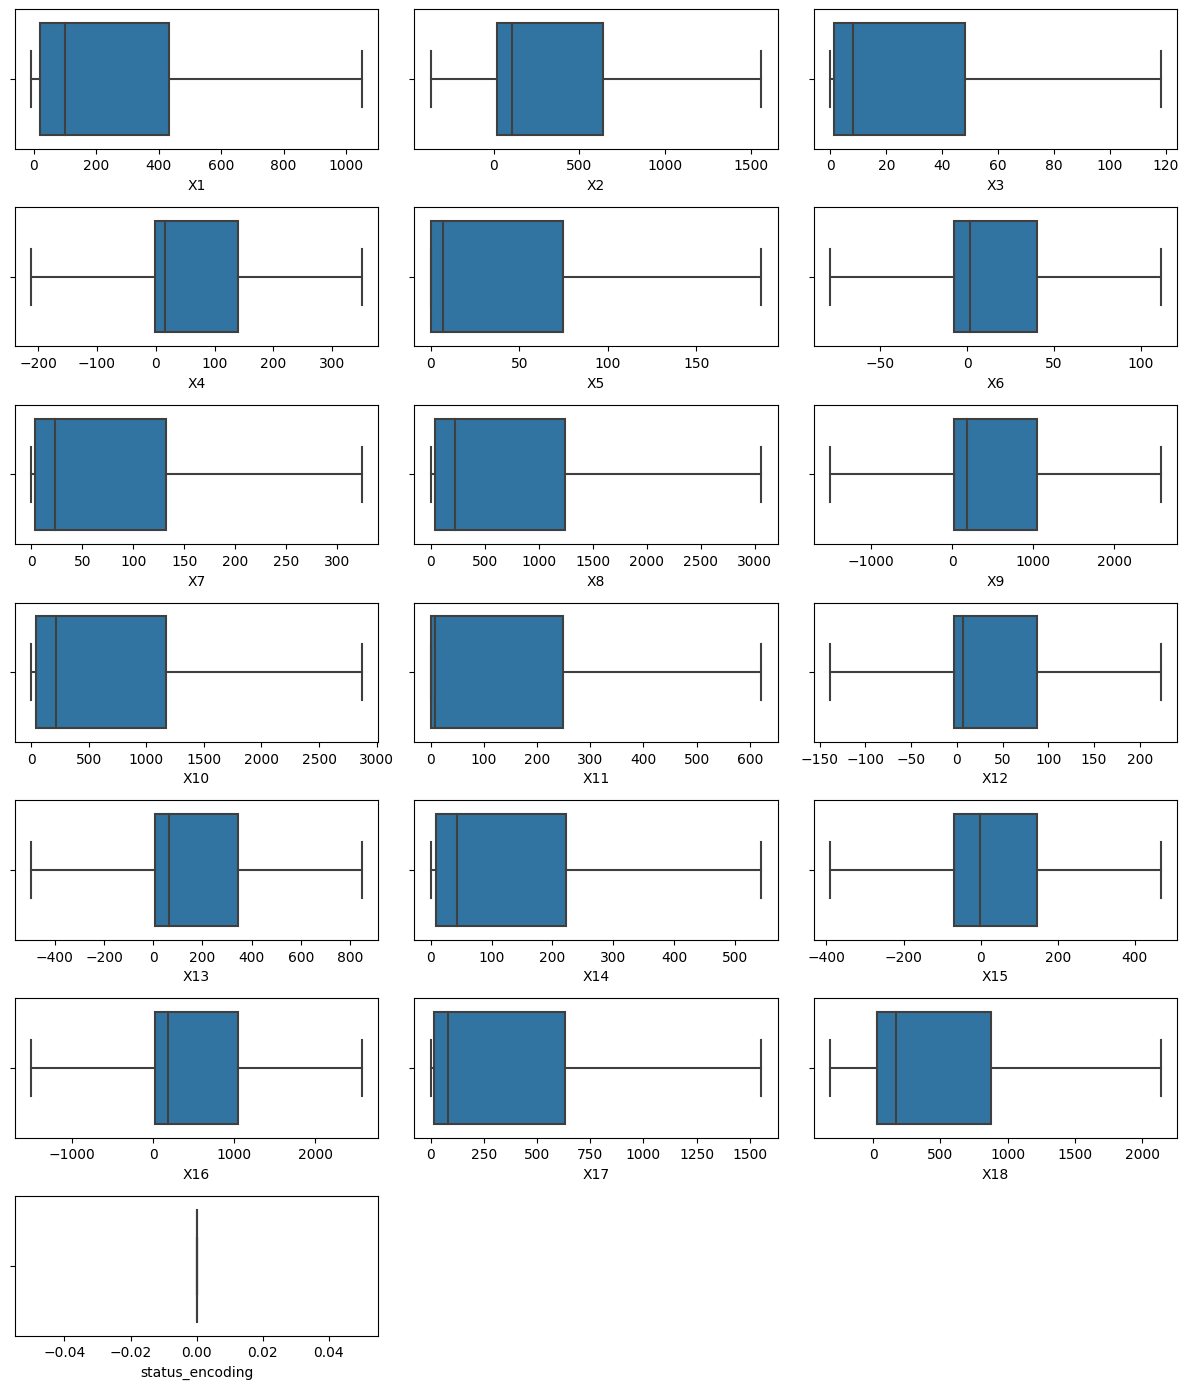

In [4]:
features_to_plot = df.columns

for feature in features_to_plot:
  Q1 = df[feature].quantile(0.25)
  Q2 = df[feature].quantile(0.50)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3- Q1
  lowerBound = Q1 - 1.5 * IQR
  upperBound = Q3 + 1.5 * IQR
  df[feature] = df[feature].clip(lower=lowerBound, upper=upperBound)

num_features = len(features_to_plot)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(12, 2 * num_rows))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])

plt.tight_layout()
plt.show()

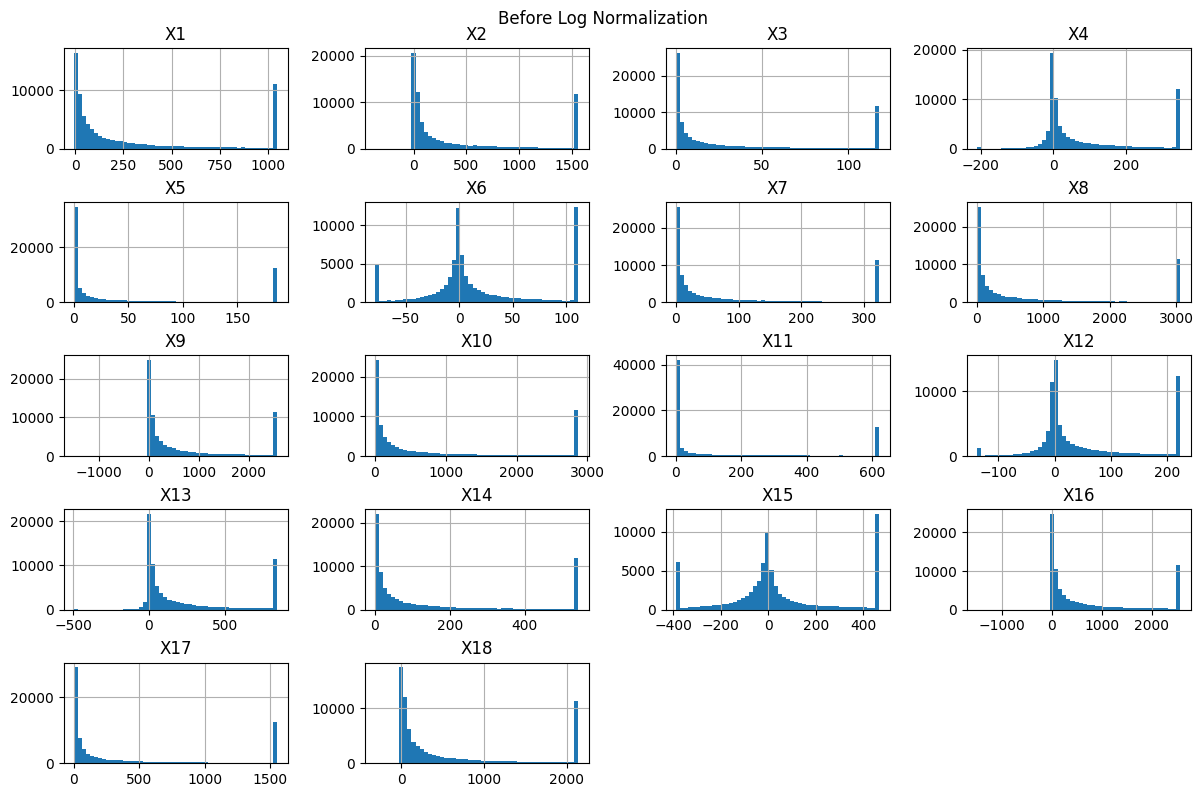

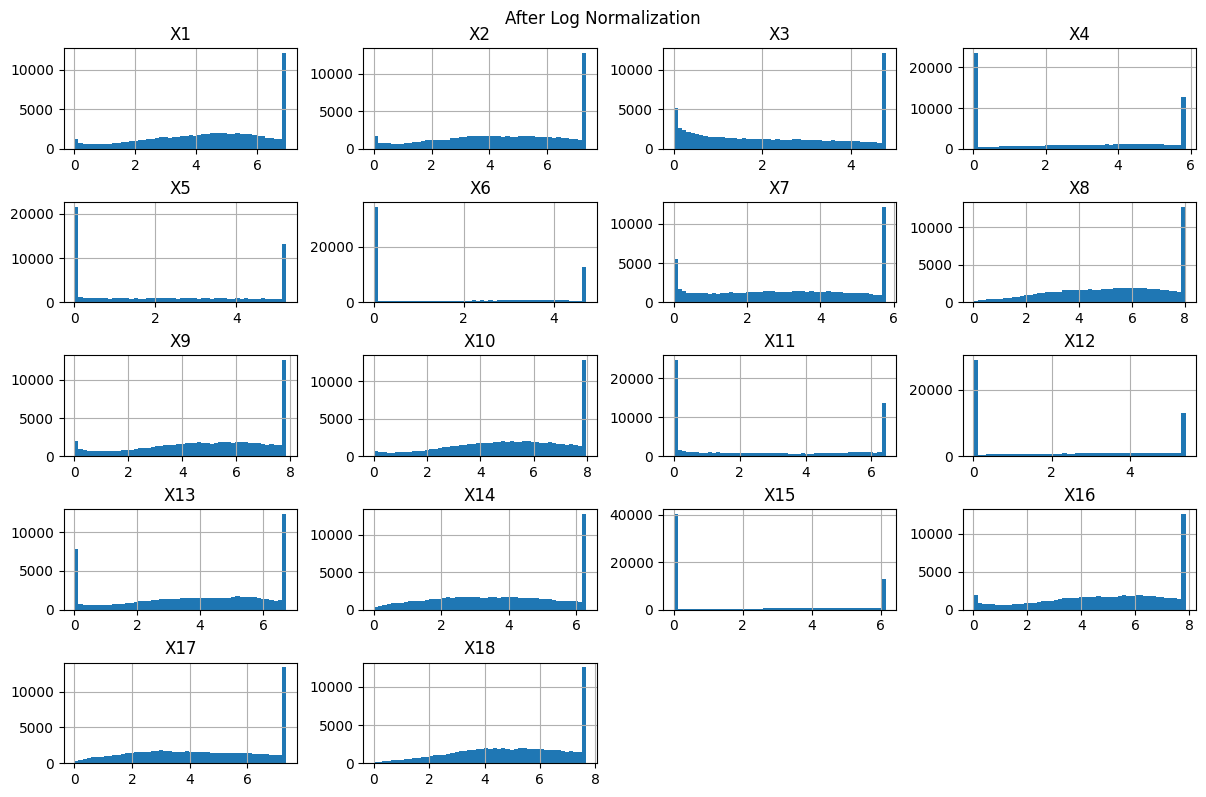

In [5]:
# Log Normalization (the best normalization)

# df_log = df

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize before transformation
df[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply log transformation
for column in columns_to_normalize:
    df[column] = df[column].apply(lambda x: np.log1p(x) if x > 0 else 0)

# Replace any remaining inf values with Nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Visualize after transformation
df[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# df = df_log

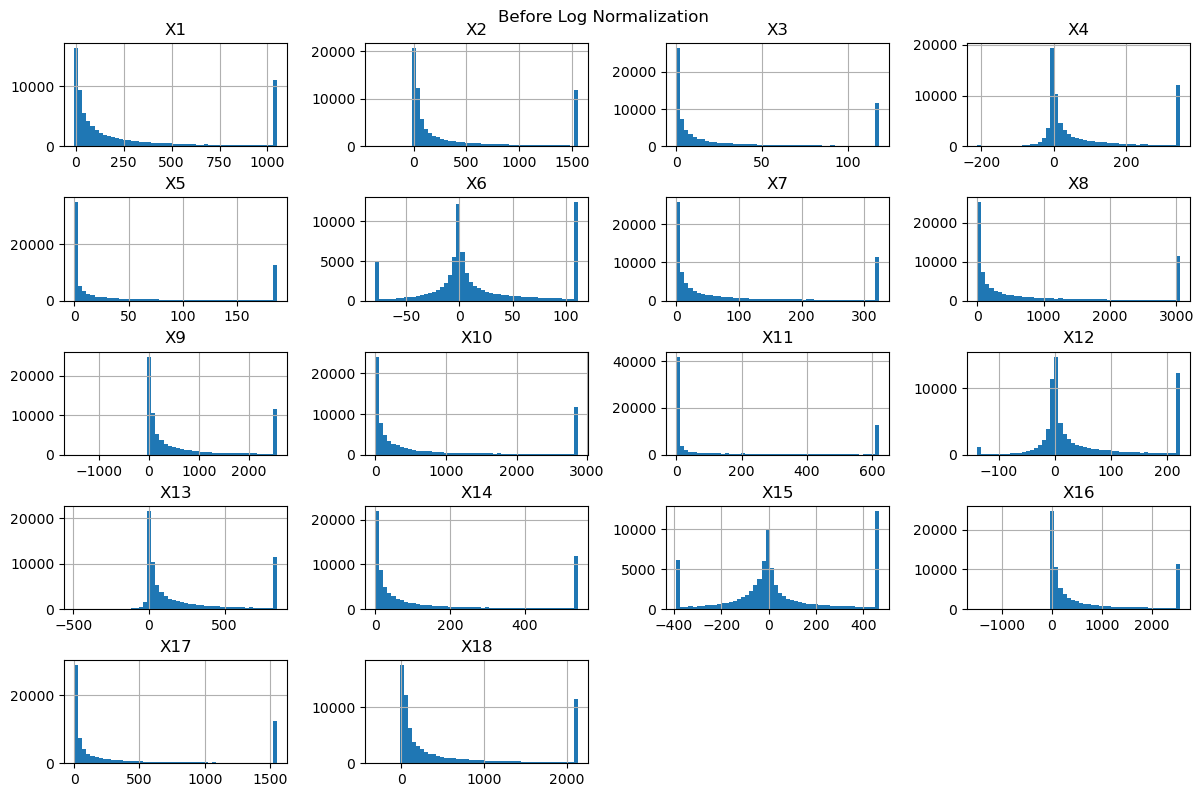

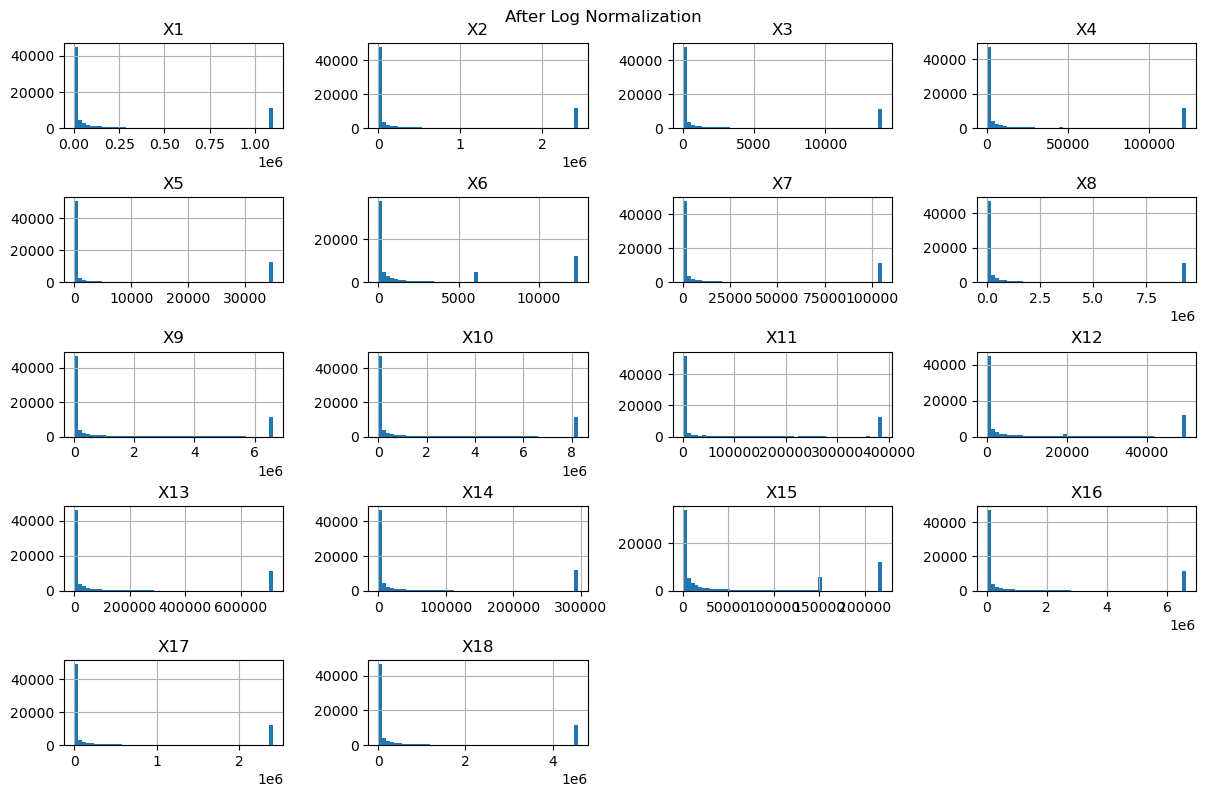

In [44]:
# Square Normalization

df_square = df

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize before transformation
df_square[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply square transformation
for column in columns_to_normalize:
    df_square[column] = df_square[column].apply(lambda x: x**2)

# Visualize after transformation
df_square[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

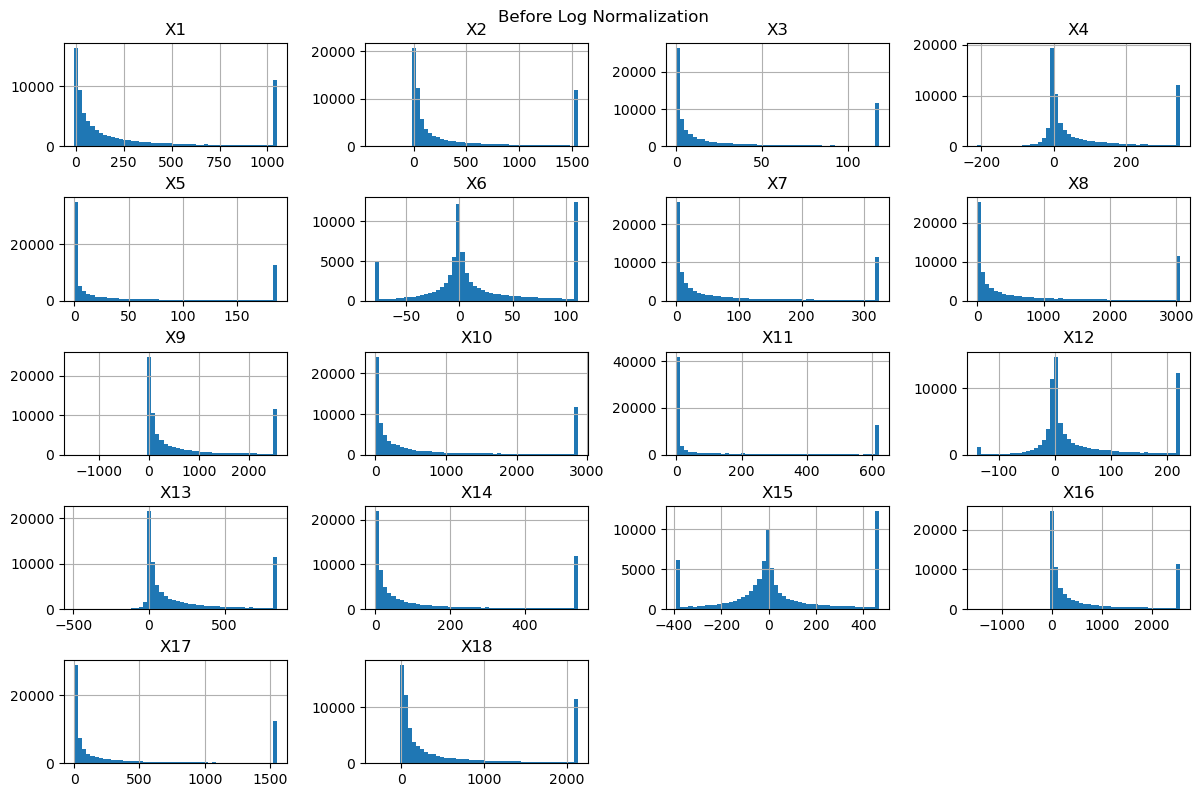

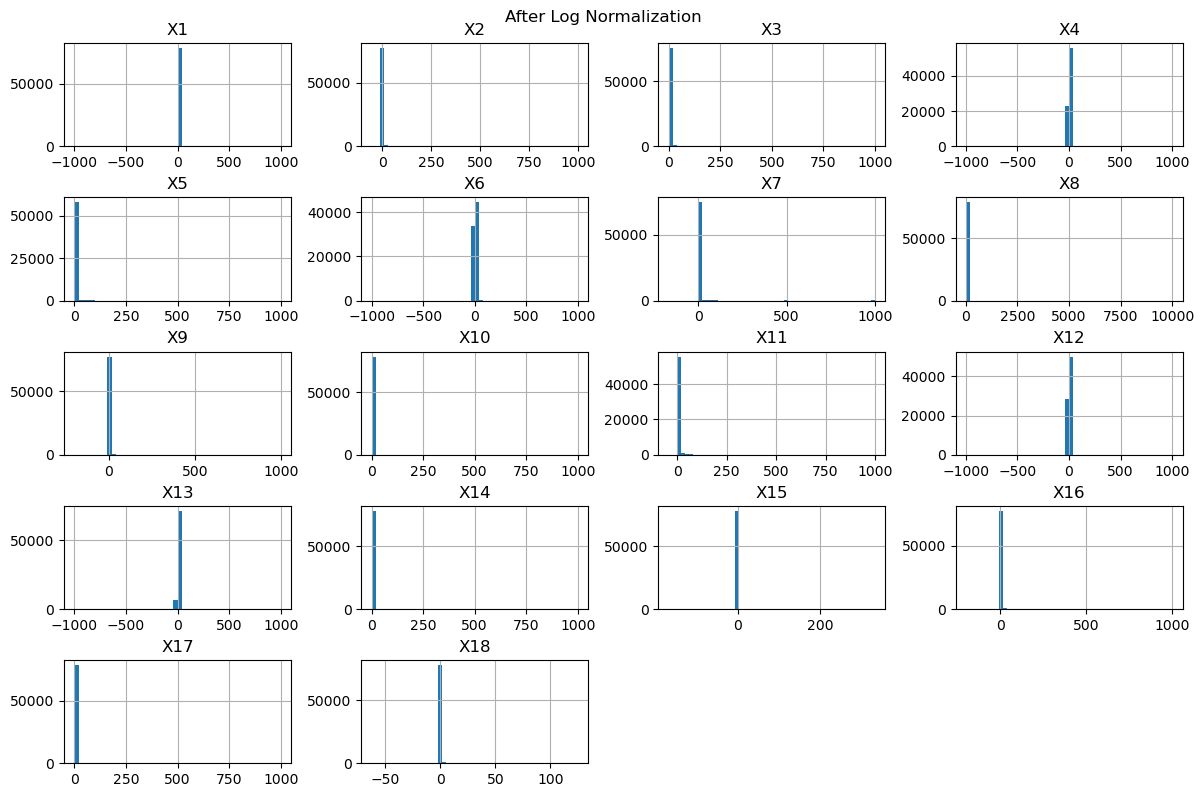

In [51]:
# Inverse Normalization

df_inverse = df

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize before transformation
df_inverse[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply inverse transformation
for column in columns_to_normalize:
    df_inverse[column] = df_inverse[column].apply(lambda x: 1/x if x != 0 else np.nan)

# Visualize after transformation
df_inverse[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

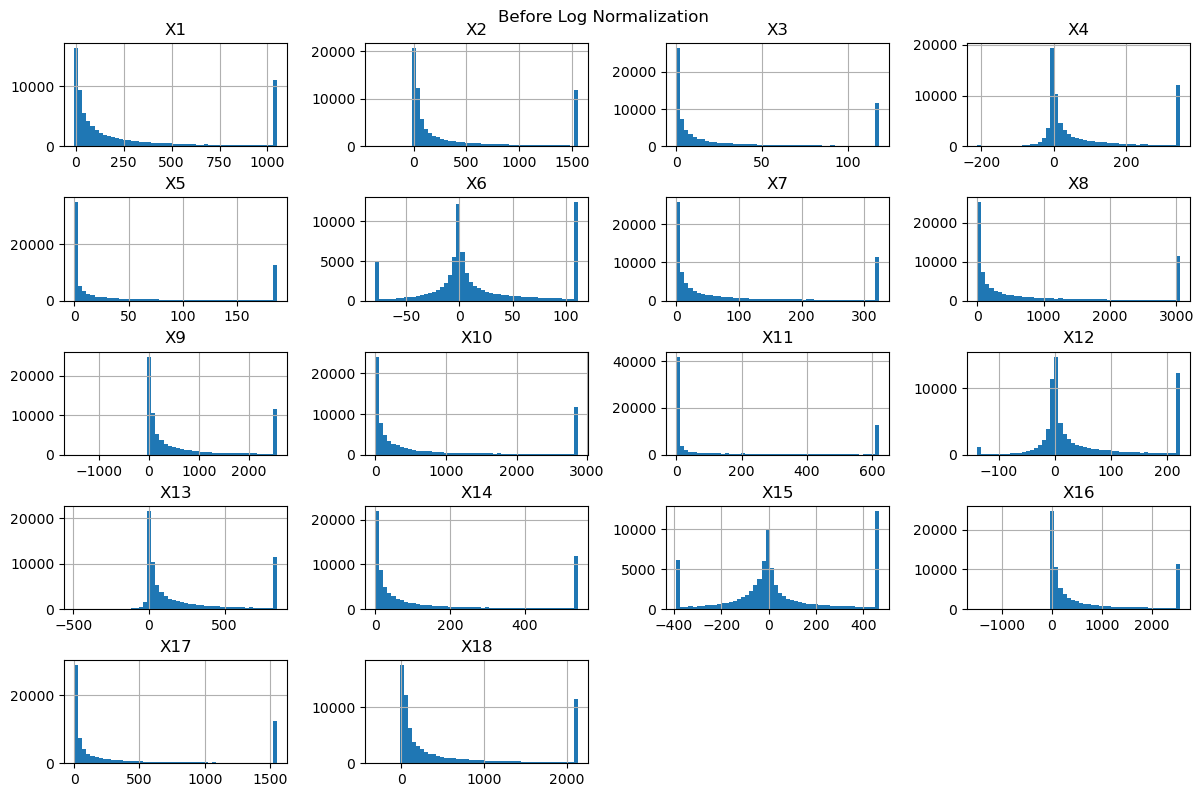

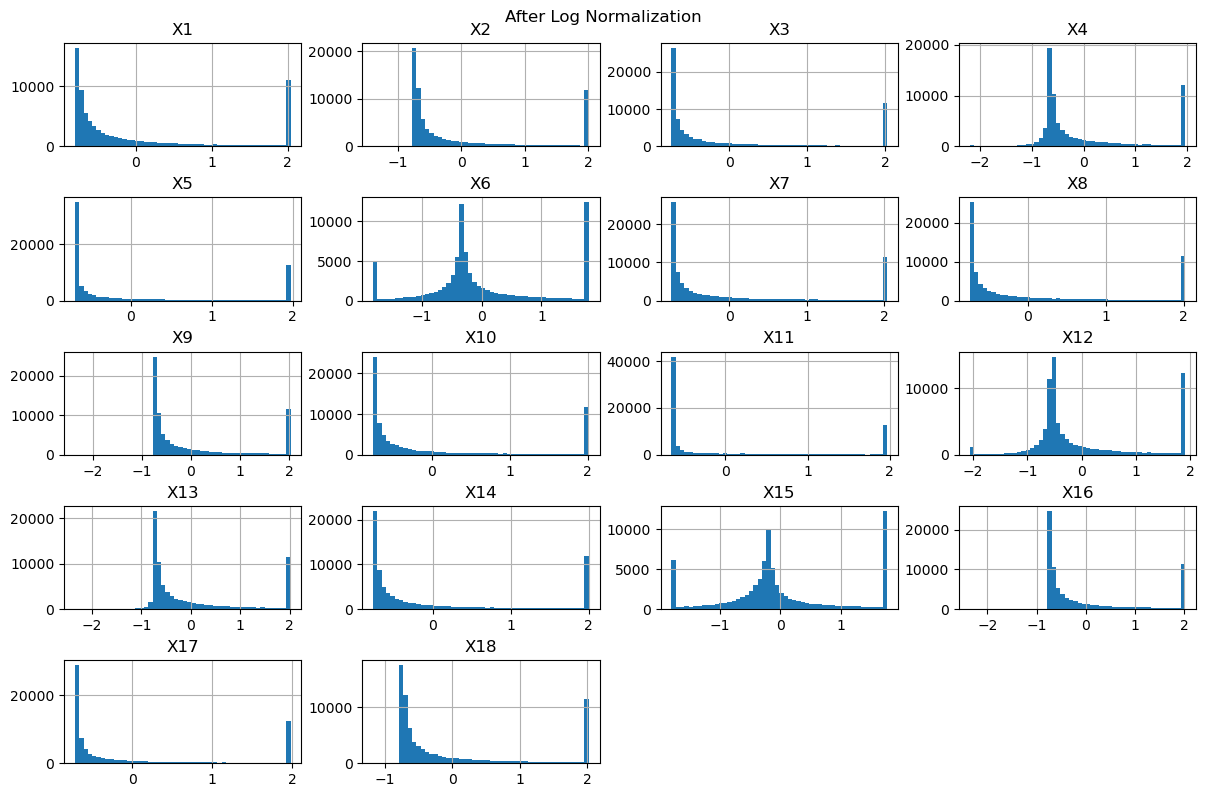

In [56]:
# Z-Score Normalization

df_z_score = df

columns_to_normalize = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                       'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                       'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

# Visualize before transformation
df_z_score[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('Before Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

# Apply z-score transformation
for column in columns_to_normalize:
    mean = df_z_score[column].mean()
    std = df_z_score[column].std()
    df_z_score[column] = (df_z_score[column] - mean) / std

# Visualize after transformation
df_z_score[columns_to_normalize].hist(bins=50, figsize=(12, 8))
plt.suptitle('After Log Normalization')
plt.tight_layout(pad=0.5)
plt.show()

         X1        X2        X3        X4        X5        X6        X7  \
0  0.917926  0.982118  0.527643  0.933261  1.443173  0.988041  0.947516   
1  1.300472  1.310550  1.473405  1.375204  1.443173  1.542355  1.380270   
2  0.543906  0.727920 -0.066172  0.542162  1.379554  0.800977 -1.473528   
3  1.300472  1.310550  1.473405  1.375204  1.443173  1.542355  1.380270   
4 -0.201195  0.042872  0.226470  0.348415 -0.060007  0.222509  0.296445   
5  0.918346  1.310550  1.473405  1.375204  0.340526  1.542355  1.350347   
6  0.687122  1.104850  1.473405  1.354660  0.205359 -0.927692  0.880052   
7  0.918707  0.463912  0.604614 -1.190082 -1.139878 -0.927692  0.183632   
8 -0.086545 -0.154549  0.602388  0.380397 -0.846888  0.208521 -0.075793   
9 -0.188664 -0.213372  0.517442  0.158728 -1.139878 -0.927692  0.066342   

         X8        X9       X10       X11       X12       X13       X14  \
0  0.787007  0.899661  0.690988 -1.034001  1.083556  0.885729  1.031701   
1  1.304173  1.264990  1

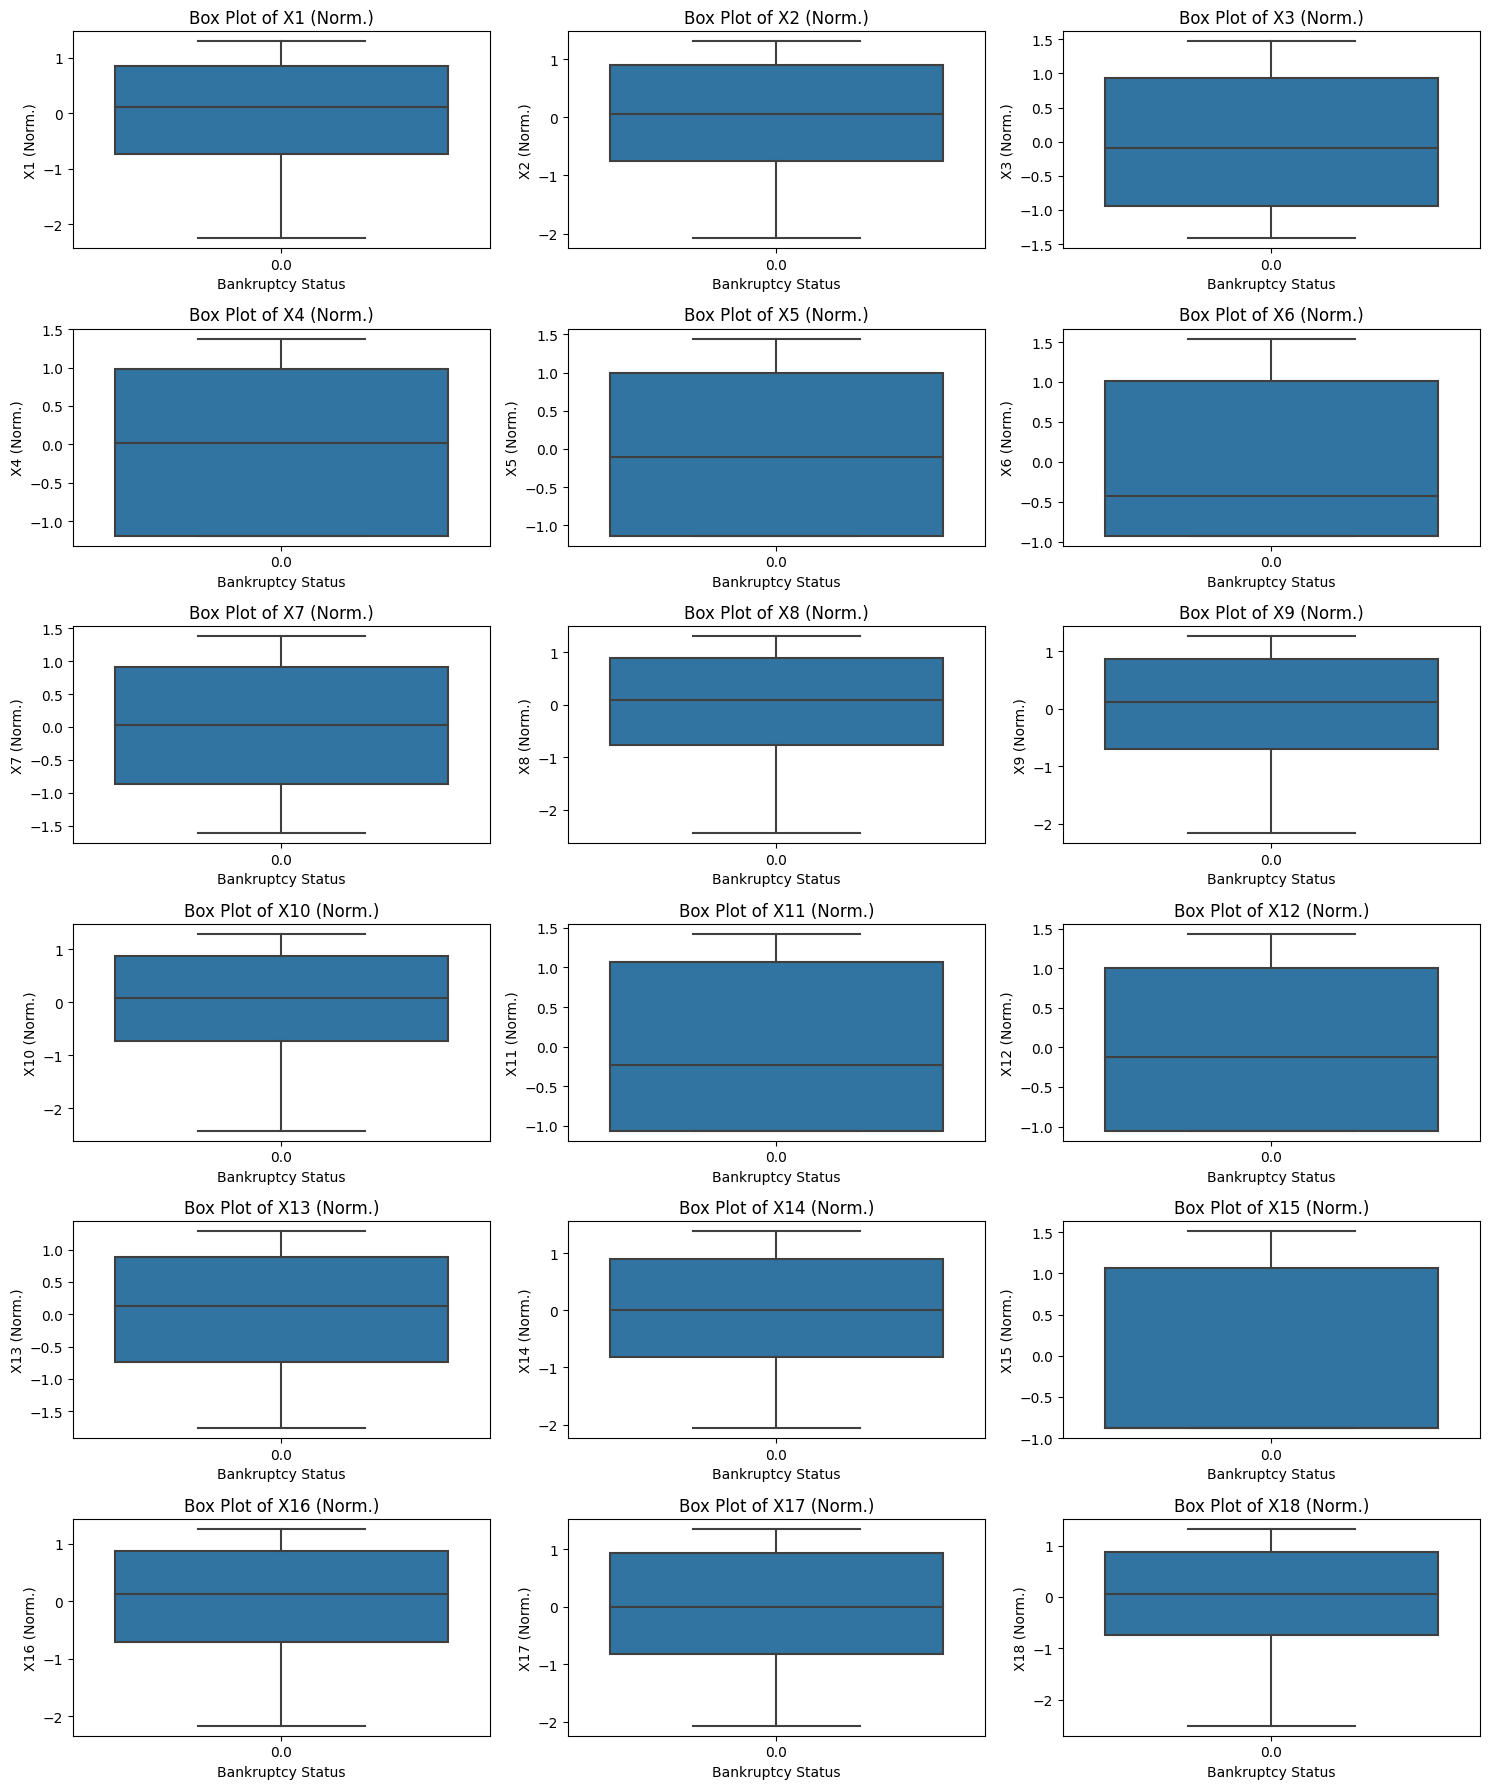

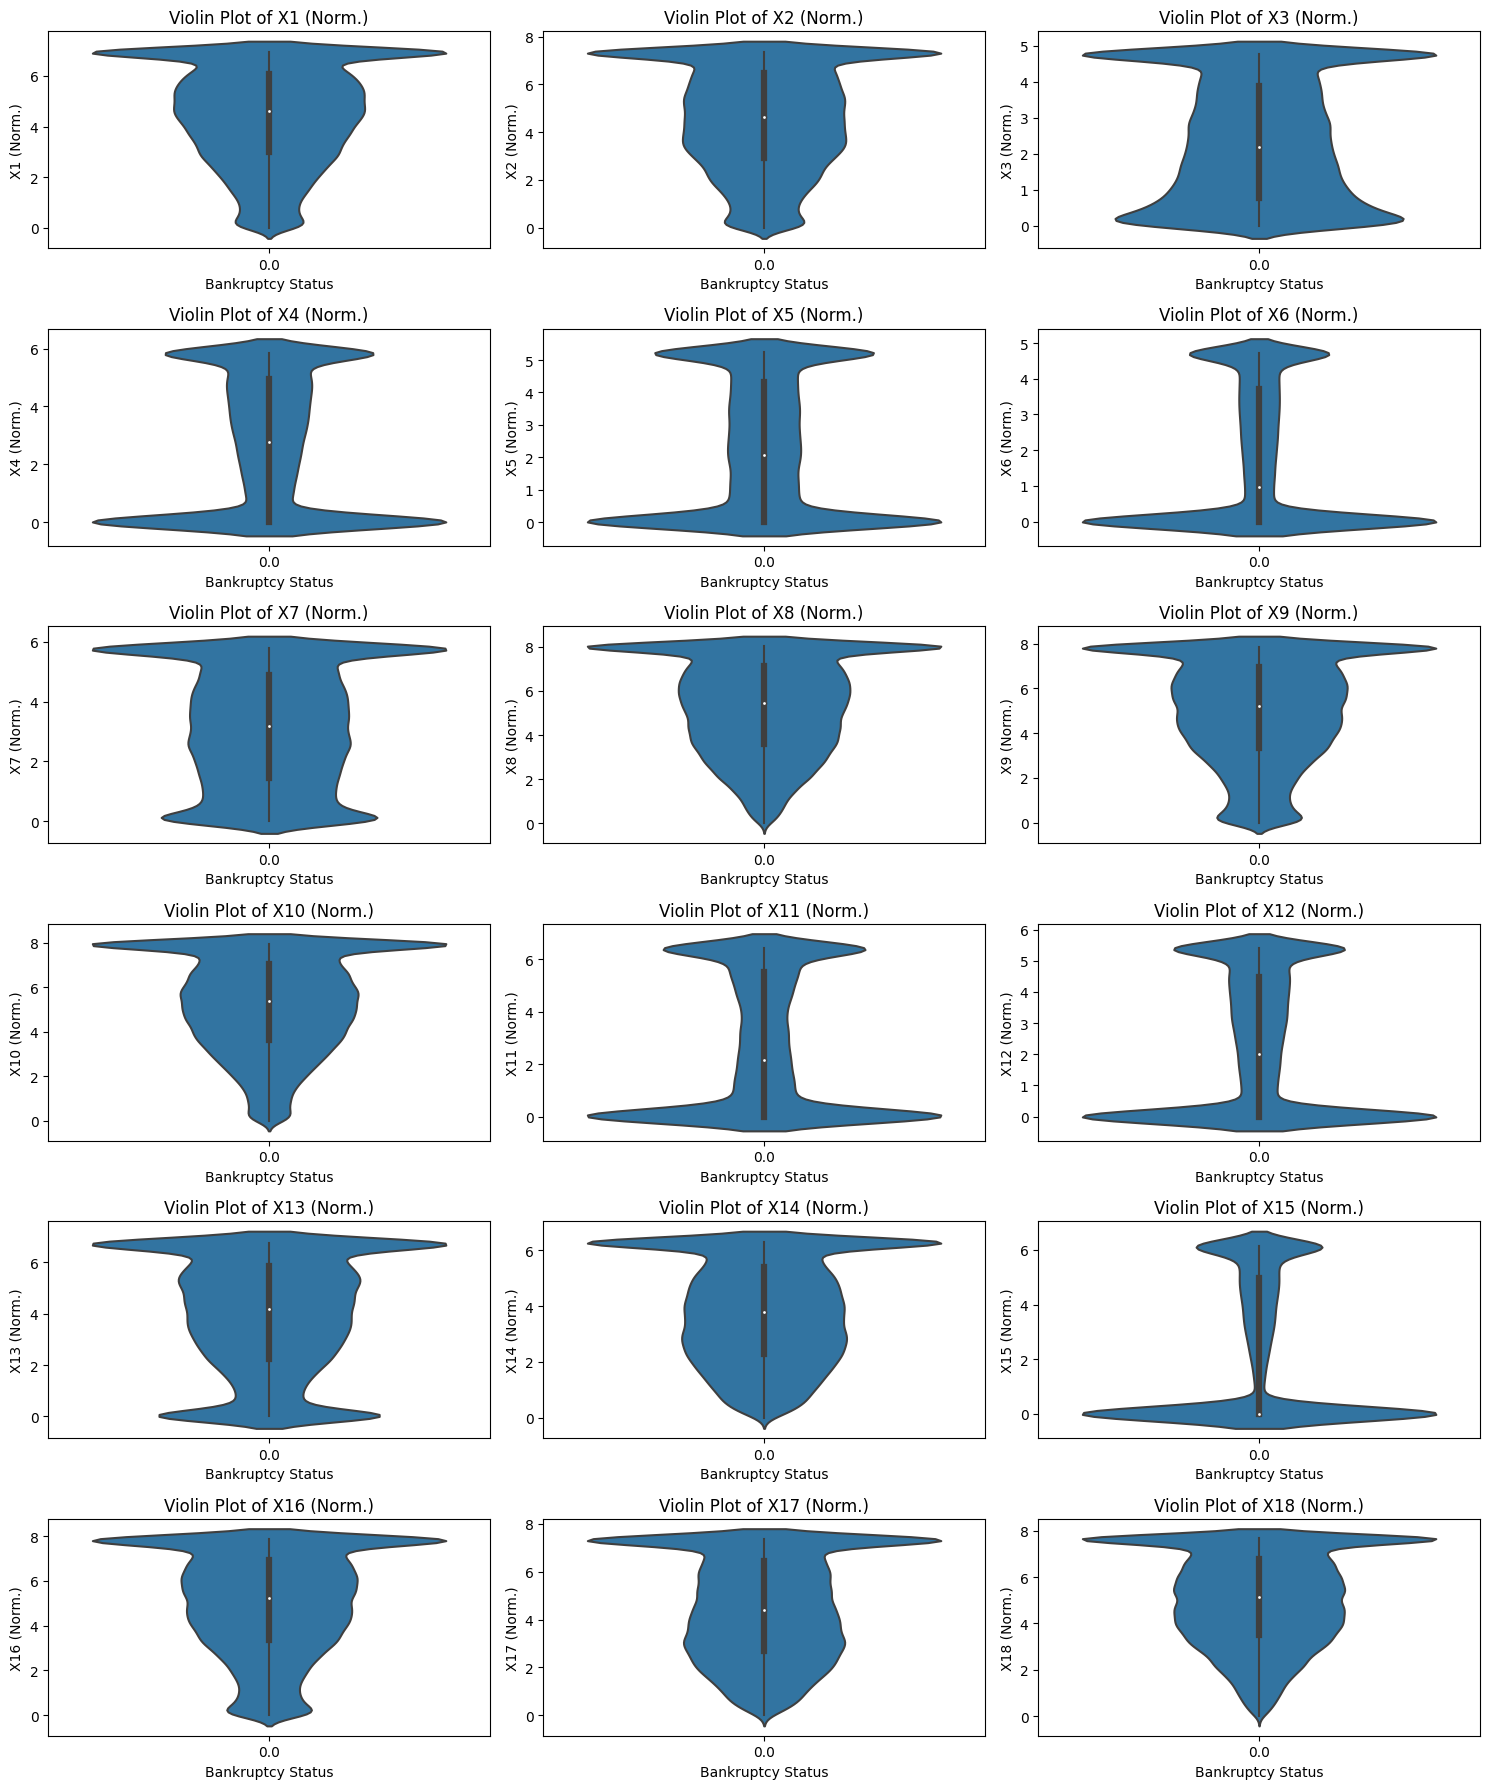

In [6]:
# Data Scaling/Standardization

scaler = StandardScaler()

X = df.iloc[:, :-1]
y = df["status_encoding"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.20, shuffle = True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns = X.columns), pd.DataFrame(y_train.reset_index(drop = True), columns = ["status_encoding"])], axis = 1)
test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns = X.columns), pd.DataFrame(y_test.reset_index(drop = True), columns = ["status_encoding"])], axis = 1)
df_scaled = pd.concat([train_scaled, test_scaled], axis = 0)
print(df_scaled.head(10))

fig, axes = plt.subplots(6, 3, figsize = (15, 18))
i = 0
j = 0

for column in df_scaled.columns[:-1]:
    sns.boxplot(x = "status_encoding", y = column, data = df_scaled, ax = axes[i, j])
    axes[i, j].set_title(f"Box Plot of {column} (Norm.)")
    axes[i, j].set_xlabel("Bankruptcy Status")
    axes[i, j].set_ylabel(f"{column} (Norm.)")
    j += 1
    if j == 3:
        i += 1
        j = 0
plt.tight_layout()
plt.show()

print("\n\n\n\n")

fig, axes = plt.subplots(6, 3, figsize = (15, 18))
i = 0
j = 0
for column in df_scaled.columns[:-1]:
    sns.violinplot(x = "status_encoding", y = column, data = df, ax = axes[i, j])
    axes[i, j].set_title(f"Violin Plot of {column} (Norm.)")
    axes[i, j].set_xlabel("Bankruptcy Status")
    axes[i, j].set_ylabel(f"{column} (Norm.)")
    j += 1
    if j == 3:
        i += 1
        j = 0
plt.tight_layout()
plt.show()

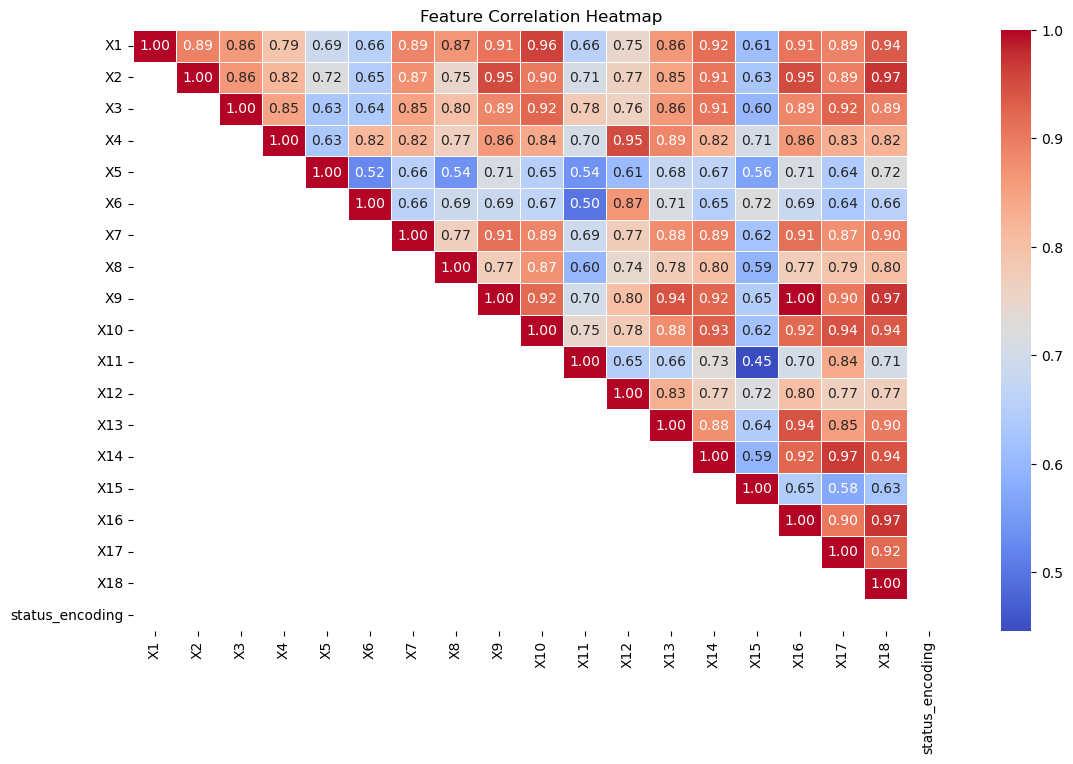

Dropped columns: ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X12', 'X13', 'X14', 'X16', 'X17', 'X18']


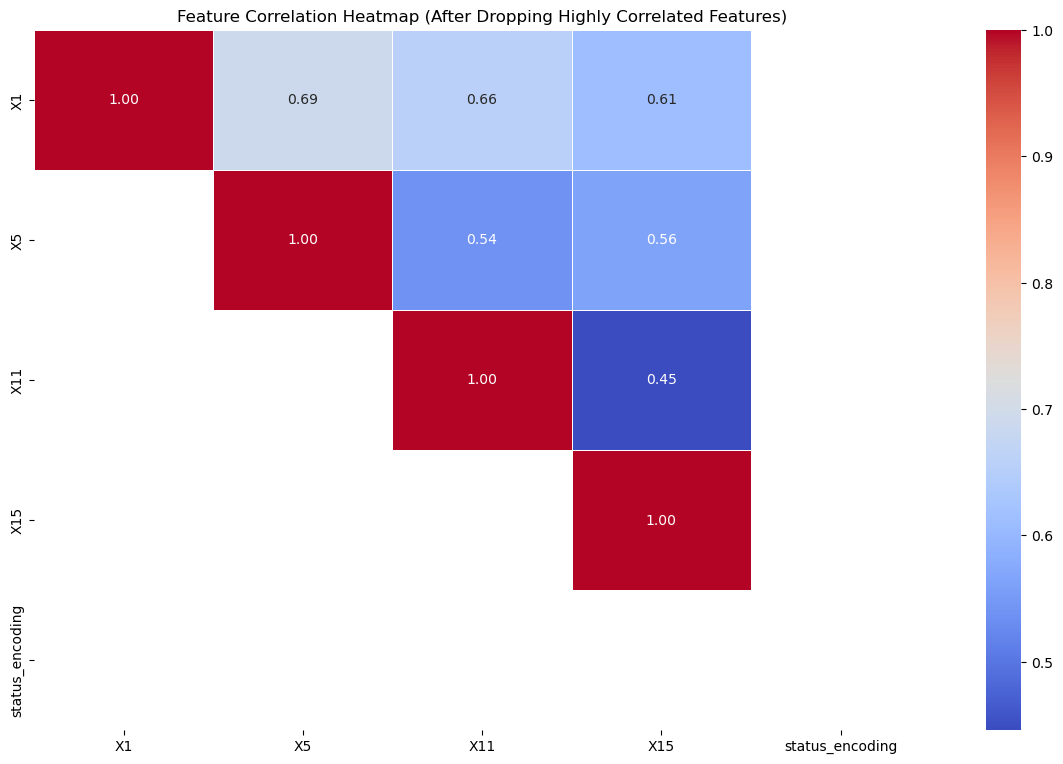

In [30]:
# Feature Selection Heatmap (the best)

# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask for the lower triangle to avoid the mirror values
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Invert the mask to keep the upper triangle
mask = np.invert(mask)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout(pad=2.0)
plt.show()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than a threshold
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop features 
df_reduced = df.drop(columns=to_drop)

print(f"Dropped columns: {to_drop}")

# Recalculate the correlation matrix after dropping features
correlation_matrix_reduced = df_reduced.corr().abs()

# Create a mask for the lower triangle to avoid the mirror values
mask_reduced = np.triu(np.ones_like(correlation_matrix_reduced, dtype=bool))

# Invert the mask to keep the upper triangle
mask_reduced = np.invert(mask_reduced)

# Create a heatmap with the updated correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reduced, mask=mask_reduced, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (After Dropping Highly Correlated Features)')
plt.tight_layout(pad=2.0)
plt.show()

In [8]:
# # Feature Selection Variance Inflation Factor (OLD VERSION)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Function to calculate VIF
# def calculate_vif(df):
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = df.columns
    
#     # Calculate VIF for each feature
#     vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
#     return vif_data

# # Drop any columns with zero or near-zero variance before calculating VIF
# def drop_zero_variance_features(df):
#     non_constant_columns = [col for col in df.columns if df[col].std() > 1e-10]  # threshold for near-zero variance
#     return df[non_constant_columns]

# # Check for near-zero variance
# df_non_constant = drop_zero_variance_features(df)

# # Calculate VIF
# vif_df = calculate_vif(df_non_constant)

# # Display VIF DataFrame
# print(vif_df)

# # Drop features with VIF > 5 (or another threshold)
# df_reduced = df.drop(columns=vif_df[vif_df['VIF'] > 5]['feature'])

# print(f"Dropped columns: {vif_df[vif_df['VIF'] > 5]['feature'].tolist()}")




# WORKS ALMOST THE BEST
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Drop any columns with zero or near-zero variance before calculating VIF
def drop_zero_variance_features(df):
    non_constant_columns = [col for col in df.columns if df[col].std() > 1e-10]  # threshold for near-zero variance
    return df[non_constant_columns]

# Drop features with perfect multicollinearity
def drop_perfect_multicollinearity(df):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find columns with perfect correlation
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1.0)]
    return df.drop(columns=to_drop)

# Check for near-zero variance
df_non_constant = drop_zero_variance_features(df)

# Check for perfect multicollinearity
df_non_collinear = drop_perfect_multicollinearity(df_non_constant)

# Calculate VIF
vif_df = calculate_vif(df_non_collinear)

# Display VIF DataFrame
print("VIF before dropping high VIF features:")
print(vif_df)

# Drop features with VIF > 5 (or another threshold)
threshold = 5
features_to_drop = vif_df[vif_df['VIF'] > threshold]['feature']
df_reduced = df_non_collinear.drop(columns=features_to_drop)

# Display the reduced DataFrame
print(f"Dropped columns: {features_to_drop.tolist()}")
print("DataFrame after dropping high VIF features:")
print(df_reduced.head())

# Check if there are multiple features remaining
if df_reduced.shape[1] > 1:
    # Recalculate VIF after dropping high VIF features
    vif_df_reduced = calculate_vif(df_reduced)
    print("VIF after dropping high VIF features:")
    print(vif_df_reduced)
else:
    print("Not enough features remaining to calculate VIF.")



VIF before dropping high VIF features:
   feature         VIF
0       X1  133.186398
1       X2  147.447757
2       X3   25.499535
3       X4   48.209943
4       X5    5.674133
5       X6    8.710404
6       X7   27.228086
7       X8   38.052146
8       X9  253.345449
9      X10  233.999786
10     X11   11.678499
11     X12   31.923932
12     X13   73.604099
13     X14  174.215608
14     X15    4.401677
15     X17  255.598830
16     X18  310.709108
Dropped columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X17', 'X18']
DataFrame after dropping high VIF features:
        X15
0  5.308396
1  5.323327
2  4.945940
3  4.829161
4  4.889477
Not enough features remaining to calculate VIF.


In [ ]:
# Feature Selection by Feature Importance (Random Forest)
